# CoinGecko REST API: extracting crypto currency data

## Libraries and settings

In [55]:
# Libraries
import os                              # Für Betriebssystem-Operationen (z.B. Dateipfade)
import locale                          # Für Lokalisierungseinstellungen (Zahlenformate etc.)
import pandas as pd                    # Für Datenanalyse und -manipulation
import json                           # Für JSON-Verarbeitung
locale.setlocale(locale.LC_ALL,"")     # Setzt lokale Einstellungen auf Systemstandard (z.B. Zahlenformate)

import matplotlib.pyplot as plt        # Für Visualisierungen/Plots
plt.style.use('dark_background')       # Setzt dunkles Theme für alle Plots

# CoinGecko
from pycoingecko import CoinGeckoAPI   # API-Client für CoinGecko (offizielle Python-Wrapper-Bibliothek rund um die CoinGecko-REST-API)
cg = CoinGeckoAPI()                    # Erstellt API-Client-Instanz

# Settings
import warnings
warnings.filterwarnings("ignore")        # Unterdrückt Python-Warnungen

# Current working directory
print(f'Current working directory: {os.getcwd()}')  # Zeigt an, wo das Notebook ausgeführt wird

Current working directory: /Users/nico/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Anji&Nico/Nico/03_Bildung_und_Sport/Schule/ZHAW/Master/01_Arbeitsordner/001_Repo_Clones/data_ingestion/03_CoinGecko_WebAPI


## Get data

In [44]:
### Simple price endpoint with the required parameters

#Ein API‑Aufruf an die CoinGecko‑Bibliothek wird ausgeführt
cg.get_price(ids='bitcoin', vs_currencies='usd')

# ids = Die Kryptowährung, für die der Preis abgerufen werden soll (hier: Bitcoin)
# vs_currencies = Die Währung, in der der Preis angegeben werden soll (hier: US-Dollar)
# Die Funktion gibt (in der Regel) ein Python‑Dictionary zurück, z. B.: {'bitcoin': {'usd': 110305}}


{'bitcoin': {'usd': 110151}}

In [45]:
# Multiple arguments (USD)
cg.get_price(ids=['bitcoin', 'near', 'ethereum', 'dogecoin'], vs_currencies='usd')

{'bitcoin': {'usd': 110068},
 'dogecoin': {'usd': 0.183488},
 'ethereum': {'usd': 3852.1},
 'near': {'usd': 2.12}}

In [46]:
## Multiple arguments (USD & EUR)
# Funktioniert auch ohne ohne semikolon getrennte Strings...
cg.get_price(ids=['bitcoin, near, ethereum, dogecoin'], vs_currencies=['usd, eur'])

{'bitcoin': {'usd': 110068, 'eur': 94939},
 'dogecoin': {'usd': 0.183488, 'eur': 0.158268},
 'ethereum': {'usd': 3852.1, 'eur': 3322.64},
 'near': {'usd': 2.12, 'eur': 1.83}}

In [56]:
# Pass optional parameters as defined in the API doc (https://www.coingecko.com/api/docs/v3)
data = cg.get_price( ids='bitcoin, near, ethereum, dogecoin', 
                     vs_currencies='usd', 
                     include_market_cap='true', 
                     include_24hr_vol='true', 
                     include_24hr_change='true', 
                     include_last_updated_at='true')
data


# ids                       —> welche Coins du abfragen willst (z. B. "bitcoin" oder ['bitcoin','ethereum']).
# vs_currencies             —> in welcher Währung der Preis ausgegeben werden soll (z. B. 'usd' oder ['usd','eur']).
# include_market_cap        —> wenn true: zusätzlich Marktwert (Market Cap) pro Coin zurückgeben.
# include_24hr_vol          —> wenn true: zusätzlich das 24‑Stunden‑Handelsvolumen pro Coin zurückgeben.
# include_24hr_change       —> wenn true: zusätzlich die prozentuale 24‑Stunden‑Änderung (change) zurückgeben.
# include_last_updated_at   —> wenn true: zusätzlich ein Zeitstempel (Unix epoch) für das letzte Update zurückgeben.

{'bitcoin': {'usd': 110068,
  'usd_market_cap': 2197308175196.701,
  'usd_24h_vol': 33592128578.56433,
  'usd_24h_change': -0.15353490940998954,
  'last_updated_at': 1762099282},
 'dogecoin': {'usd': 0.183488,
  'usd_market_cap': 27839997218.679523,
  'usd_24h_vol': 840250687.0134128,
  'usd_24h_change': -1.9235501513094821,
  'last_updated_at': 1762099286},
 'ethereum': {'usd': 3852.1,
  'usd_market_cap': 465249978017.1233,
  'usd_24h_vol': 15066713954.500195,
  'usd_24h_change': -0.9782774116045482,
  'last_updated_at': 1762099282},
 'near': {'usd': 2.12,
  'usd_market_cap': 2718363576.8142724,
  'usd_24h_vol': 104603867.66554144,
  'usd_24h_change': -1.5471216850990155,
  'last_updated_at': 1762099290}}

In [48]:
### Variante 1: Werte extrahieren (Vorlage von Dozent)
# Extract single values
names = list(data.keys())        # 1. Holt alle Coin-Namen als Liste
print(names)                     # 2. Zeigt die Liste
print("----------------")
print(names[0])                  # 3. Zeigt den ersten Coin-Namen
print(data[names[0]]["usd"])     # 4. Holt den USD-Preis des ersten Coins

print("----------------")

## Variante 2: Direkter Zugriff auf Werte
# Direkter Zugriff auf bitcoin-Daten
print("Bitcoin Preis:", data['bitcoin']['usd'])

# ODER wenn du nicht weißt, welcher Coin der erste ist:
first_coin = next(iter(data))
print(f"Erster Coin ({first_coin}):", data[first_coin]['usd'])



['bitcoin', 'dogecoin', 'ethereum', 'near']
----------------
bitcoin
110068
----------------
Bitcoin Preis: 110068
Erster Coin (bitcoin): 110068


In [49]:
# Einfachere Version zum Auslesen der Werte
print("=== Alle Coins und ihre USD-Preise ===")
for coin, values in data.items():
    print(f"{coin}: ${values['usd']:,.2f}")

print("\n=== Erster Coin im Detail ===")
first_coin = next(iter(data))  # Holt den ersten Key (Coin-Namen)
coin_data = data[first_coin]   # Holt alle Werte für diesen Coin
# Zeigt alle verfügbaren Daten für den ersten Coin
print(f"Name: {first_coin}")
print(f"Preis: ${coin_data['usd']:,.2f}")
if 'usd_market_cap' in coin_data:
    print(f"Market Cap: ${coin_data['usd_market_cap']:,.0f}")
if 'usd_24h_vol' in coin_data:
    print(f"24h Volumen: ${coin_data['usd_24h_vol']:,.0f}")
if 'usd_24h_change' in coin_data:
    print(f"24h Änderung: {coin_data['usd_24h_change']:.2f}%")
if 'last_updated_at' in coin_data:
    from datetime import datetime
    update_time = datetime.fromtimestamp(coin_data['last_updated_at'])
    print(f"Letztes Update: {update_time:%Y-%m-%d %H:%M:%S}")



## F-Strings für formatierte Ausgaben (Beispiel)
#zahl = 1234.5678

## .2f - zwei Dezimalstellen
# f"{zahl:.2f}"      # → "1234.57"

## ,.2f - Tausendertrennzeichen und zwei Dezimalstellen
# f"{zahl:,.2f}"     # → "1,234.57"

## .0f - keine Dezimalstellen (rundet)
# f"{zahl:.0f}"      # → "1235"

## >10 - rechtsbündig in 10 Zeichen
# f"{zahl:>10}"      # → "  1234.5678"

## <10 - linksbündig in 10 Zeichen
# f"{zahl:<10}"      # → "1234.5678  "


=== Alle Coins und ihre USD-Preise ===
bitcoin: $110,068.00
dogecoin: $0.18
ethereum: $3,852.10
near: $2.12

=== Erster Coin im Detail ===
Name: bitcoin
Preis: $110,068.00
Market Cap: $2,197,308,175,197
24h Volumen: $33,592,128,579
24h Änderung: -0.15%
Letztes Update: 2025-11-02 17:01:22


## Extract and plot data

In [50]:
# Keys from dictionary (Coin names / erste Spalte)
names = list(data.keys())

# Get values from dictionary and format to 2 decimal places
values = []
for i in range(len(names)):
    vals = data[names[i]]["usd"]
    formatted_val = f'{vals:.2f}'
    values.append(formatted_val)

# Create DataFrame
df = pd.DataFrame({
    'Name': names,
    'Value': values})

# Convert 'Value' column to numeric
df['Value'] = pd.to_numeric(df['Value'])

# Sort DataFrame by 'Value' in descending order
df = df.sort_values(by='Value', ascending=False)

print(df)

       Name      Value
0   bitcoin  110068.00
2  ethereum    3852.10
3      near       2.12
1  dogecoin       0.18


In [57]:
print(data.items())

# Einfachere Version: Direkt ein DataFrame aus den USD-Preisen erstellen
df = pd.DataFrame([
    {'Name': coin, 'Value': values['usd']}
    for coin, values in data.items()
])

# Sortieren (optional)
df = df.sort_values('Value', ascending=False)

# Formatierung direkt beim Ausgeben
with pd.option_context('display.float_format', '${:,.2f}'.format):
    print("\nEinfache Version des DataFrames mit formatierten Zahlen:")
    print(df)

dict_items([('bitcoin', {'usd': 110068, 'usd_market_cap': 2197308175196.701, 'usd_24h_vol': 33592128578.56433, 'usd_24h_change': -0.15353490940998954, 'last_updated_at': 1762099282}), ('dogecoin', {'usd': 0.183488, 'usd_market_cap': 27839997218.679523, 'usd_24h_vol': 840250687.0134128, 'usd_24h_change': -1.9235501513094821, 'last_updated_at': 1762099286}), ('ethereum', {'usd': 3852.1, 'usd_market_cap': 465249978017.1233, 'usd_24h_vol': 15066713954.500195, 'usd_24h_change': -0.9782774116045482, 'last_updated_at': 1762099282}), ('near', {'usd': 2.12, 'usd_market_cap': 2718363576.8142724, 'usd_24h_vol': 104603867.66554144, 'usd_24h_change': -1.5471216850990155, 'last_updated_at': 1762099290})])

Einfache Version des DataFrames mit formatierten Zahlen:
       Name       Value
0   bitcoin $110,068.00
2  ethereum   $3,852.10
3      near       $2.12
1  dogecoin       $0.18


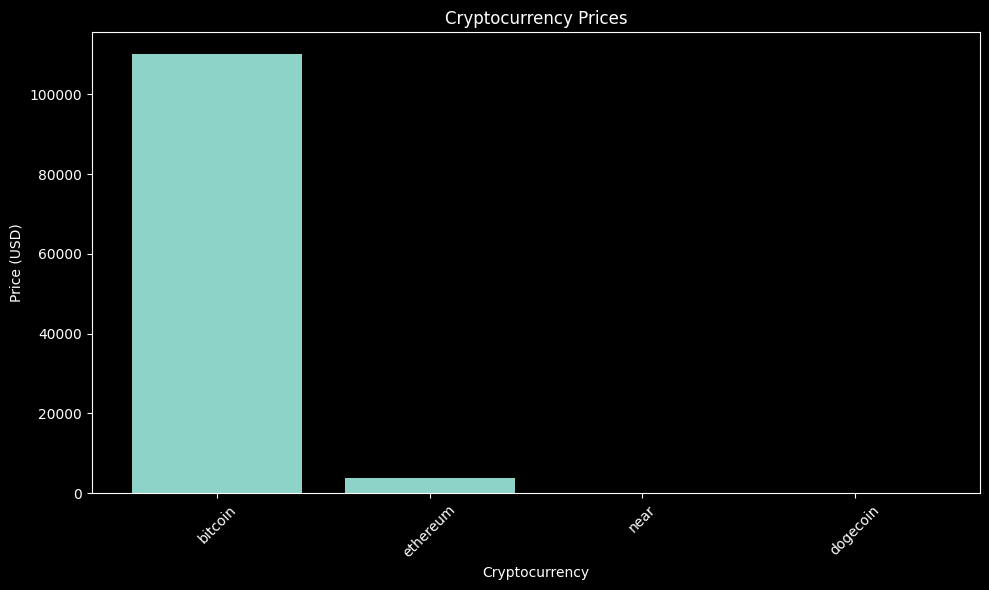

In [52]:
# Einfache Plot-Version (nur Preise)
plt.figure(figsize=(10, 6))
plt.bar(df['Name'], df['Value'])
plt.xlabel('Cryptocurrency')
plt.ylabel('Price (USD)')
plt.title('Cryptocurrency Prices')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

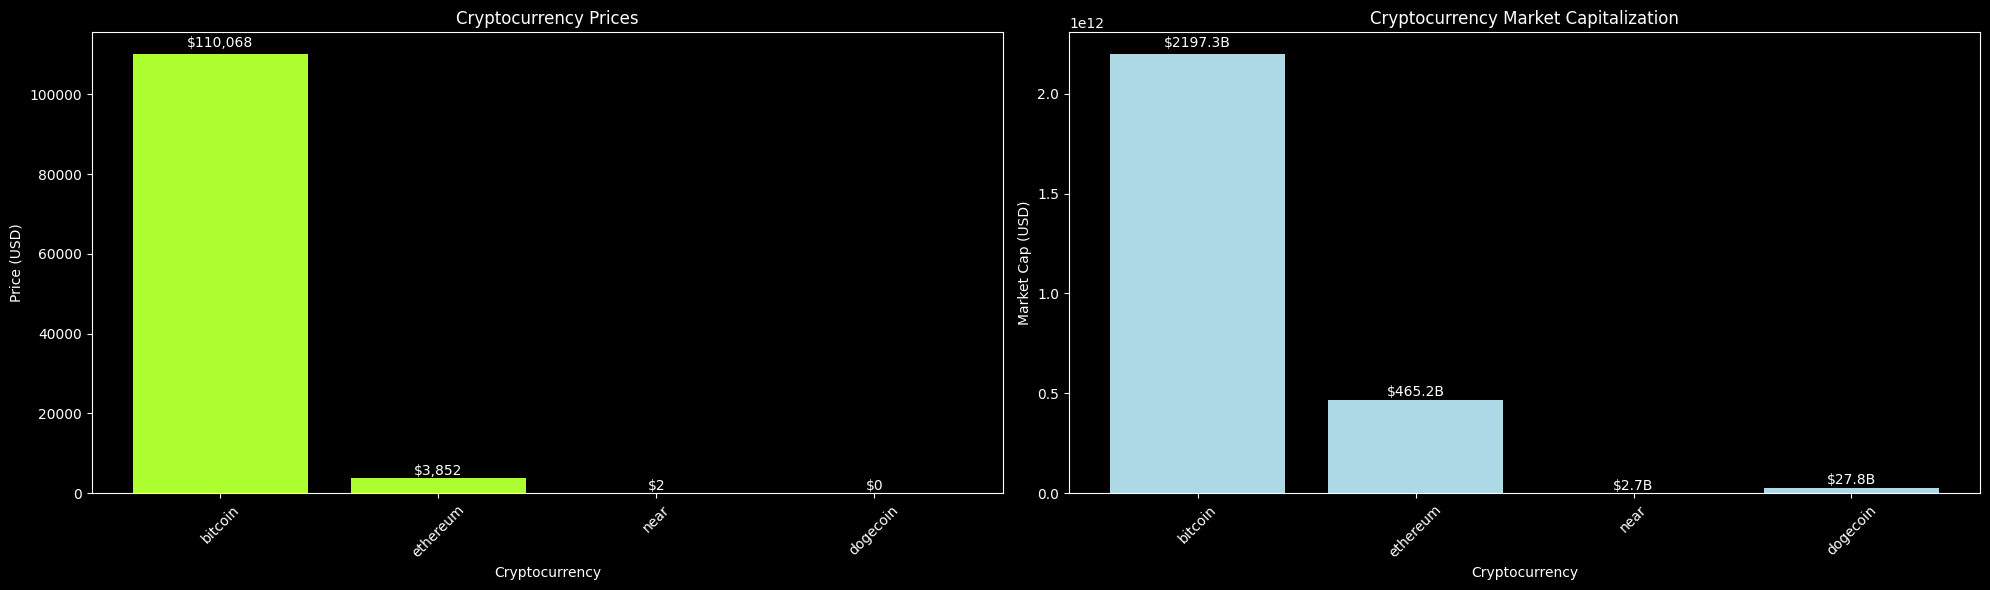

In [58]:
# Verbesserte Plot-Version mit zwei Subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))  # 1 Zeile, 2 Spalten, doppelt so breit

# Erster Plot (Links): Preise als Balken
bars1 = ax1.bar(df['Name'], df['Value'], color='greenyellow')
ax1.set_xlabel('Cryptocurrency')
ax1.set_ylabel('Price (USD)')
ax1.set_title('Cryptocurrency Prices')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)  # Korrekte Methode für Rotation

# Werte über den Balken mit $-Format (Preise)
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, 
             height * 1.01,
             f'${height:,.0f}',
             ha='center',
             va='bottom')

# Zweiter Plot (Rechts): Market Cap als Balken
market_caps = [data[coin]['usd_market_cap'] for coin in df['Name']]
bars2 = ax2.bar(df['Name'], market_caps, color='lightblue')
ax2.set_xlabel('Cryptocurrency')
ax2.set_ylabel('Market Cap (USD)')
ax2.set_title('Cryptocurrency Market Capitalization')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)  # Korrekte Methode für Rotation

# Werte über den Balken mit $-Format (Market Cap)
for bar in bars2:
    height = bar.get_height()
    # Formatiere große Zahlen in Milliarden
    formatted_height = f'${height/1e9:.1f}B'
    ax2.text(bar.get_x() + bar.get_width()/2, 
             height * 1.01,
             formatted_height,
             ha='center',
             va='bottom')

# Layout optimieren
plt.tight_layout()  # Verhindert abgeschnittene Labels
plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [54]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Darwin | 25.0.0
Datetime: 2025-11-02 17:01:31
Python Version: 3.9.6
-----------------------------------
